<a href="https://colab.research.google.com/github/luizvmachado/data-manipulation-exercises/blob/master/Regress%C3%A3o_Linear_Sites_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instalando Geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.3 MB/s 
     |████████████████████████████████| 16.7 MB 55.4 MB/s 
     |████████████████████████████████| 6.3 MB 52.0 MB/s 


In [55]:
#Importando bibliotecas
%matplotlib inline
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import seaborn as sns
import os

In [4]:
#Conectando ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Carregando bases
rj = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ-MUNICCOLAB/33MUE250GC_SIR.shp')
dados = pd.read_table(r'/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ-MUNICCOLAB/dados.txt')

In [6]:
#Dataset com as geometrias dos municípios do estado do RJ
rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


In [7]:
#Dataset sobre imóveis disponíveis para aluguel/venda no RJ.
dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [8]:
#Selecionando apenas o município do Rio de Janeiro
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


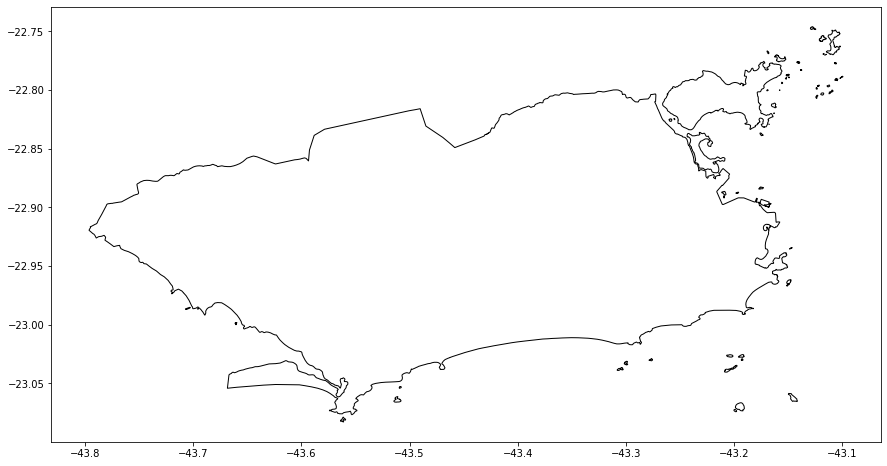

In [9]:
rj.plot(color = 'white', edgecolor = 'black', figsize = (15,8))

In [10]:
#Criando geometria dos dados dos imóveis
x = zip(dados.Longitude, dados.Latitude)
geometry = [Point(x) for x in x]


#Criando GeoDataFrame
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

In [11]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)


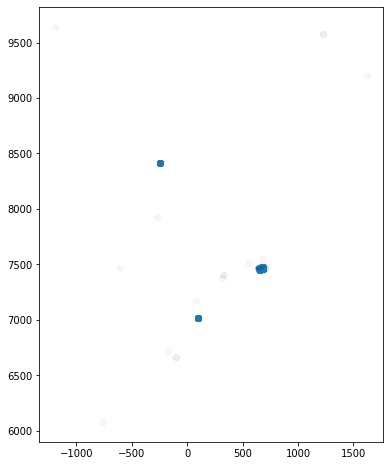

In [14]:
#Plotando a geometria dos imóveis, percebe-se que tem muitos outiliers. 
base = rj.plot(color='black', edgecolor ='black', figsize = (15,8))
geo_dados.plot(ax = base, 
               figsize = (15,8),
               alpha = 0.05)

In [ ]:
#Padronizando CRS
#Entrar no site www.spatialreference.org e procurar o EPSG do brasil. SIRGAS 2000.
#Escolher de acordo com a região dos gráficos
#ESPG31983 DA CIDADE DO RJ
#clicar em PROJ4 e copiar os dados

In [13]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [15]:
#Filtrando apenas imóveis no município do Rio de Janeiro
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

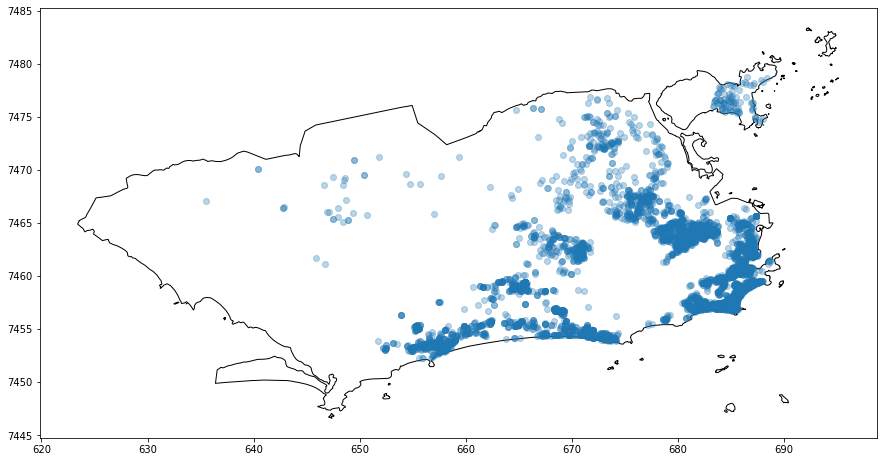

In [16]:
#Plotando imóveis no mapa da cidade
base = rj.plot(color='white', edgecolor ='black', figsize = (15,8))
geo_dados.plot(ax=base, 
              figsize=(15,8),
              alpha = 0.3)

In [19]:
#Carregando dataframes de transporte. dados encontrados em data.rio
brt = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ-MUNICCOLAB/Estações_BRT.geojson')
metro = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ-MUNICCOLAB/Estações_Metrô.geojson')
trem = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ-MUNICCOLAB/Estações_Trem.geojson')

In [21]:
#Padronizando CRS
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [22]:
#Filtrando apenas dados do município do RJ
trem = trem[trem.within(rj.iloc[0].geometry)]
brt = brt[brt.within(rj.iloc[0].geometry)]

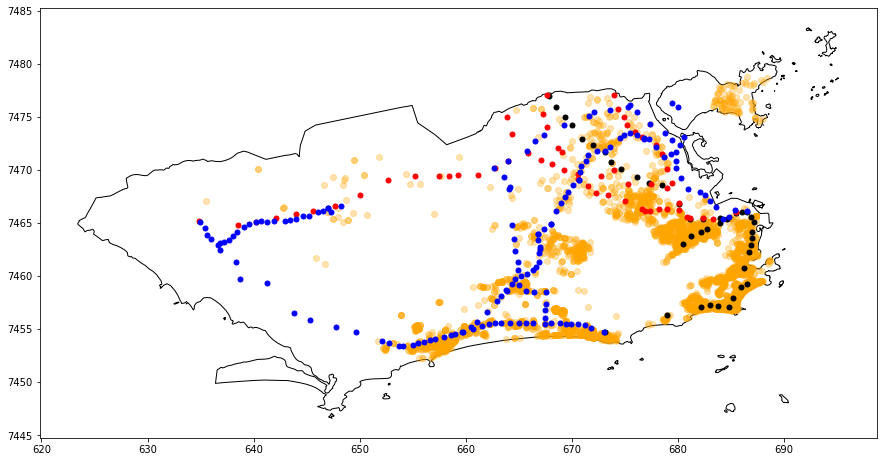

In [23]:
#Gráficos com as linhas de METRO, TREM, E BRT
base = rj.plot(color='white', edgecolor ='black', figsize = (15,8))
geo_dados.plot(ax=base, color = 'orange', figsize=(15,8), alpha = 0.3)
metro.plot(ax=base, color = 'black', markersize = 25)
trem.plot(ax=base, color = 'red', markersize = 25)
brt.plot(ax=base, color = 'blue', markersize = 25)

In [24]:
#Calculando distâncias entre transportes
geo_dados['Dist_BRT'] = geo_dados['geometry'].apply(lambda x: brt.distance(x).min())
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())
geo_dados['Dist_Trem'] = geo_dados['geometry'].apply(lambda x: trem.distance(x).min())

In [25]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_BRT,Dist_Metro,Dist_Trem
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),0.443193,15.622939,15.627477
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),3.642787,7.530741,6.266952
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),2.657083,0.736973,0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),0.422370,10.718039,12.303554
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),0.214605,17.131159,15.241645


In [27]:
#Carregando GeoDataFrame com dados de cobertura vegetal e uso da terra
praias = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ-MUNICCOLAB/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')

In [28]:
#Padronizando CRS
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [34]:
praias.head()

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
0,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,8684.890625,441.128326,19870,Outros,Corpos d’água continentais,,,8684.889153,"POLYGON ((646.900 7448.811, 646.889 7448.795, ..."
1,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,2209.344727,241.436403,19871,Outros,Corpos d’água continentais,,,2209.343321,"POLYGON ((643.818 7450.482, 643.808 7450.475, ..."
2,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17015.344727,468.728882,19872,Outros,Corpos d’água continentais,,,17015.344086,"POLYGON ((643.702 7450.429, 643.685 7450.427, ..."
3,Con,2016-01-01T00:00:00+00:00,Corpos d’água continentais,17597.541016,916.463204,19873,Outros,Corpos d’água continentais,,,17597.540796,"POLYGON ((642.611 7451.002, 642.594 7450.992, ..."
4,Vg,2016-01-01T00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.875977,605.329142,19874,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,"POLYGON ((646.501 7449.279, 646.482 7449.269, ..."


In [35]:
#Filtrando apenas dados sobre praias
praias = praias[praias['legenda'] == 'Praia']

In [36]:
praias.head()

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
21,P,2016-01-01T00:00:00+00:00,Praia,3042.035156,257.566546,19891,Outros,Praia,,,3042.036027,"POLYGON ((646.841 7448.837, 646.797 7448.877, ..."
22,P,2016-01-01T00:00:00+00:00,Praia,2155.254395,274.902433,19892,Outros,Praia,,,2155.254100,"POLYGON ((646.892 7449.217, 646.889 7449.211, ..."
23,P,2016-01-01T00:00:00+00:00,Praia,4818.130371,445.290523,19893,Outros,Praia,,,4818.129025,"POLYGON ((646.756 7449.295, 646.744 7449.264, ..."
24,P,2016-01-01T00:00:00+00:00,Praia,943641.800781,20812.992794,19894,Outros,Praia,,,943641.805845,"POLYGON ((640.986 7450.322, 641.073 7450.321, ..."
25,P,2016-01-01T00:00:00+00:00,Praia,194036.399902,8011.623950,19895,Outros,Praia,,,194036.398225,"MULTIPOLYGON (((640.042 7452.093, 640.075 7452..."


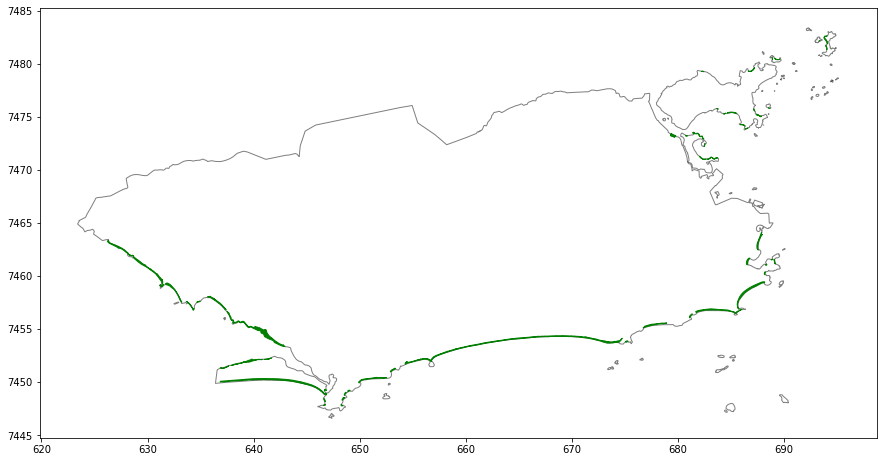

In [40]:
base = rj.plot(color = 'white', edgecolor = 'black',alpha = 0.5, figsize = (15,8))
praias.plot(ax = base,
            color = 'green',
            edgecolor = 'green')

In [42]:
#Calculando distância até a orla
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [43]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_BRT,Dist_Metro,Dist_Trem,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),0.443193,15.622939,15.627477,1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),3.642787,7.530741,6.266952,7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),2.657083,0.736973,0.641470,6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),0.422370,10.718039,12.303554,3.404589
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),0.214605,17.131159,15.241645,1.369015


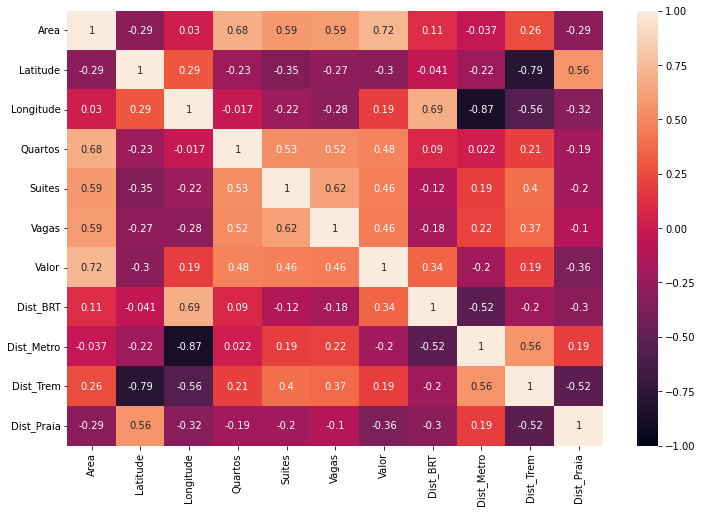

In [53]:
ax = sns.heatmap(geo_dados.corr(), vmin = -1, vmax = +1, annot = True)
ax.figure.set_size_inches(12, 8)

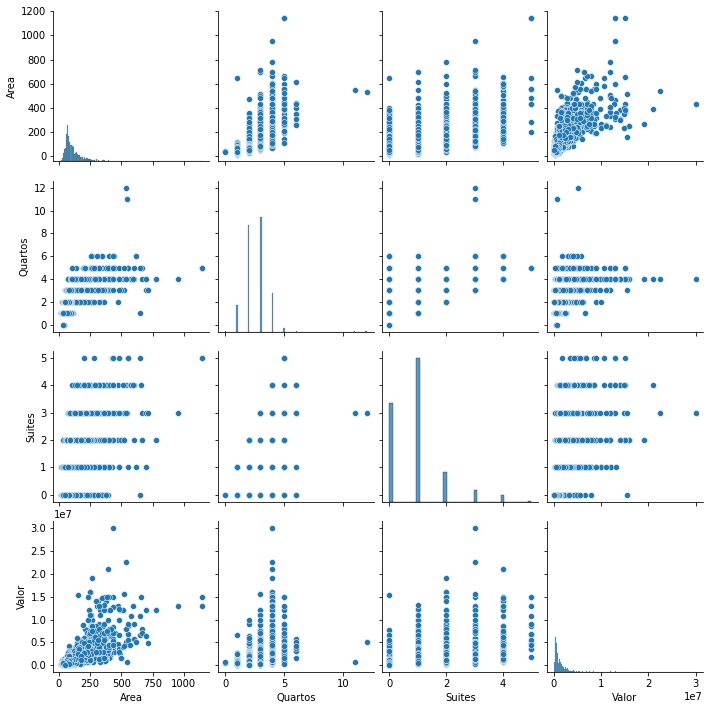

In [59]:
sns.pairplot(geo_dados[['Area','Quartos', 'Suites','Valor']])

In [56]:
#Criando diretório para salvar arquivos
dir = '/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/RJ_DISTANCIAS'
if not os.path.exists(dir):
    os.makedirs(dir)

In [57]:
#Salvando dataset
geo_dados.to_file(dir + '/DATASET.shp')

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#Dividindo o dataset

In [61]:
geo_dados.columns

Index(['Area', 'Bairro', 'Cidade', 'Endereco', 'Estado', 'Latitude',
       'Longitude', 'Quartos', 'Suites', 'Vagas', 'Tipo', 'Transacao', 'Valor',
       'geometry', 'Dist_BRT', 'Dist_Metro', 'Dist_Trem', 'Dist_Praia'],
      dtype='object')

In [78]:
X_columns = ['Area', 'Latitude','Longitude',
            'Quartos', 'Suites', 'Vagas',
            'Dist_BRT', 'Dist_Metro', 'Dist_Trem',
             'Dist_Praia']
Y_column = 'Valor'

In [79]:
#dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(geo_dados[X_columns], geo_dados['Valor'], test_size=0.20, random_state = 42)

In [80]:
#realizar a normalização dos dados para evitar enviesamento do modelo
geo_dados[X_columns].describe()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Dist_BRT,Dist_Metro,Dist_Trem,Dist_Praia
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,121.512076,-22.952875,-43.275193,2.617771,0.925105,1.222025,3.822909,3.879056,6.942257,2.978936
std,88.566429,0.046873,0.094642,0.902083,0.922614,0.907701,2.837230,5.181806,4.550326,3.141948
min,15.000000,-23.031084,-43.678834,0.000000,0.000000,0.000000,0.013361,0.026186,0.046738,0.003597
25%,70.000000,-22.985222,-43.343578,2.000000,0.000000,1.000000,1.025012,0.473695,2.652260,0.464487
50%,92.000000,-22.963529,-43.238239,3.000000,1.000000,1.000000,3.634586,1.211220,6.933125,1.430952
75%,143.000000,-22.924173,-43.194280,3.000000,1.000000,2.000000,6.431124,6.127973,10.232420,5.509465
max,1147.000000,-22.788539,-43.159735,12.000000,5.000000,6.000000,8.984762,33.793570,16.699217,19.402407


In [76]:
linear_model = LinearRegression()

In [81]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [82]:
predict = linear_model.predict(X_test)

In [83]:
mean_squared_error(y_test,predict)

1687238074605.5396

In [84]:
mean_absolute_error(y_test,predict)

608691.1813440075

In [ ]:
# Realizar normalização dos dados
# Otimizar os hiperparametros do modelo de regressão Linear